
<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_amarillo@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio A/B Testing Parametrico


#### Ejercicio 1:  Linea de montaje 

En una fabrica de componenetes textil se quiere comparar el tiempo de fabricacion de un determinado producto mediante tres métodos diferentes.  Se seleccionan aleatoriamente productos elaborados con cada uno de los métodos y se observa el tiempo de fabricación. 


1. ¿Se verifican los supuestos del modelo de análisis de la varianza?

2. ¿Existe evidencia de que el método influye en el tiempo medio de elaboración del producto?

3. La empresa valora que el tiempo de fabricación sea el menor posible. ¿Qué método cree que ofrece mejores resultados?

In [4]:
import pandas as pd
import numpy as np

# Calcular el tamaño muestral
# -----------------------------------------------------------------------
from statsmodels.stats.power import NormalIndPower
import statsmodels.stats.api as sms
from scipy.stats import levene


# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
# Otros recursos
# ------------------------------------------------------------------------------
import math
from src import soporte_abtesting as sa
# Configuración de las gráficas
# ------------------------------------------------------------------------------
# establece el estilo del fondo de las gráficas como "whitegrid". Las gráficas tendrán un fondo blanco con líneas de cuadrícula horizontales y verticales.
sns.set_style("dark")

# cambiará el esquema de colores predeterminado de Seaborn a uno más oscuro, adecuado para gráficas con fondos claros. 
sns.set_theme(style="dark")

# establece el estilo en seaborn-v0_8-darkgrid. 
plt.style.use('dark_background')

In [5]:
df1= pd.read_csv('datos/linea_montaje.csv')
df1.head()


,minutos,metodo
0,4.166484,A
1,4.887466,A
2,0.727608,A
3,8.280542,A
4,1.413129,A


1. ¿Se verifican los supuestos del modelo de análisis de la varianza?

In [6]:
sa.exploracion_dataframe(df1,'metodo')              #Exploracion de datos previa 

El número de datos es 150 y el de columnas es 2

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 0

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos



 ..................... 

Los tipos de las columnas son:


,tipo_dato
minutos,float64
metodo,object



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna METODO tiene las siguientes valore únicos:


,count
metodo,
A,50
B,50
C,50



 ..................... 

Los principales estadísticos de las columnas categóricas para el A son: 


,count,unique,top,freq
metodo,50,1,A,50



 ..................... 

Los principales estadísticos de las columnas numéricas para el A son: 


,count,mean,std,min,25%,50%,75%,max
minutos,50.0,4.720512,2.102454,0.130465,3.312806,4.690071,6.005251,9.584416



 ..................... 

Los principales estadísticos de las columnas categóricas para el B son: 


,count,unique,top,freq
metodo,50,1,B,50



 ..................... 

Los principales estadísticos de las columnas numéricas para el B son: 


,count,mean,std,min,25%,50%,75%,max
minutos,50.0,4.364523,2.085242,-0.818899,3.597334,4.506685,5.825817,7.668974



 ..................... 

Los principales estadísticos de las columnas categóricas para el C son: 


,count,unique,top,freq
metodo,50,1,C,50



 ..................... 

Los principales estadísticos de las columnas numéricas para el C son: 


,count,mean,std,min,25%,50%,75%,max
minutos,50.0,5.600274,2.329937,1.334696,4.071824,5.064969,6.976655,12.059491


In [7]:
# En la exploración anterior hemos visto que no hay duplicados, pero podría interesarnos mirar si hay algun usuario que esté más de una vez en el conjunto de datos
print(f"Tenemos un total de {df1.duplicated(subset='metodo').sum()} usuarios repetidos")

Tenemos un total de 147 usuarios repetidos


In [8]:
df1['metodo'].unique()          #variables categoricas para la comparacion

array(['A', 'B', 'C'], dtype=object)

,mean,std
metodo,,
A,4.720512,2.102454
B,4.364523,2.085242
C,5.600274,2.329937


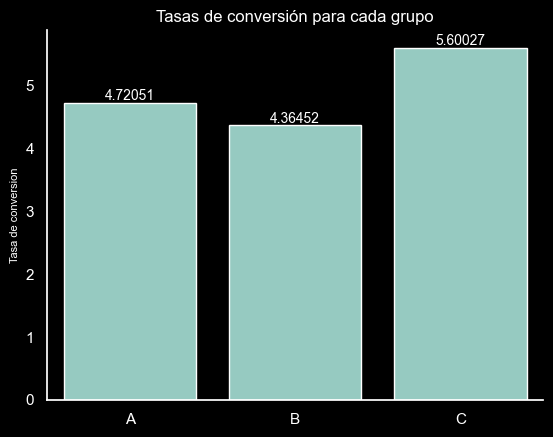

In [9]:
ratio_conversion = df1.groupby('metodo')['minutos'].agg(["mean", "std"])
display(ratio_conversion)

fig = sns.barplot(ratio_conversion, 
                  x = ratio_conversion.index, 
                  y = "mean") 

# ponemos las etiquetas en cada una de las barras
fig.bar_label(fig.containers[0], fontsize=10)


# eliminar los ejes de arriba y la derecha
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)

# ponemos título a la gráfica
fig.set_title("Tasas de conversión para cada grupo")

# cambiamos el nombre del eje y
fig.set_ylabel("Tasa de conversion", fontsize = 8)

# quitamos el nombre del eje x
fig.set_xlabel("");

In [10]:
#primero utilizamos el tes shapiro porque la muestra es mas grande de 30 para ver si nos indica normalidad
normalidad=sa.Asunciones(df1, "minutos")
normalidad.identificar_normalidad_analitica(metodo='shapiro', alpha=0.05, verbose=True)         

Para la columna minutos, los datos siguen una distribución normal según el test de Shapiro-Wilk.


Al decirnos este test que es normal, podemos continuar con el analisis de nuestras asunciones

In [11]:
homo=sa.Asunciones(df1, "minutos")
homo.identificar_homogeneidad('metodo')

En la variable metodo las varianzas son homogéneas entre grupos.


La variabilidad de los datos dentro de cada grupo es similar 

<Axes: xlabel='metodo', ylabel='minutos'>

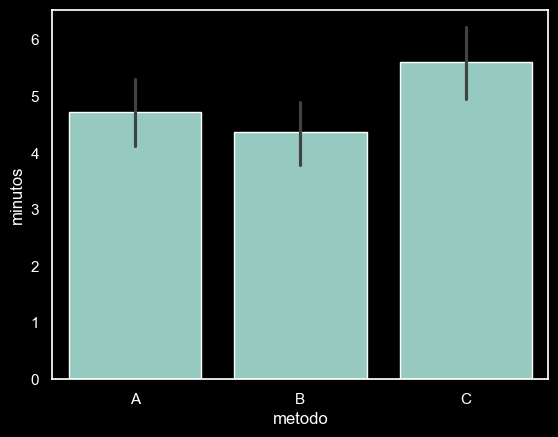

In [12]:
sns.barplot(x="metodo", y="minutos", data=df1,)             # se puede ver en el grafico como la columna A y b son bastante similares
                                                            #pero la C no 

2. ¿Existe evidencia de que el método influye en el tiempo medio de elaboración del producto?

In [13]:
anova = sa.Pruebas_parametricas("metodo",  "minutos", df1)              #Usamos anova porque hay tres metodos
anova.test_anova()                                                      #F : Entre los Grupos: La variabilidad debida a las diferencias entre los grupos.

                                                                        #f :Dentro de los Grupos: La variabilidad debida a las diferencias dentro de cada grupo individual.

Estadístico F: 4.275128289148849
Valor p: 0.015679251126397998
El p-valor de la prueba es 0.02, por lo tanto, hay diferencias significativas entre los grupos.


<Axes: ylabel='Count'>

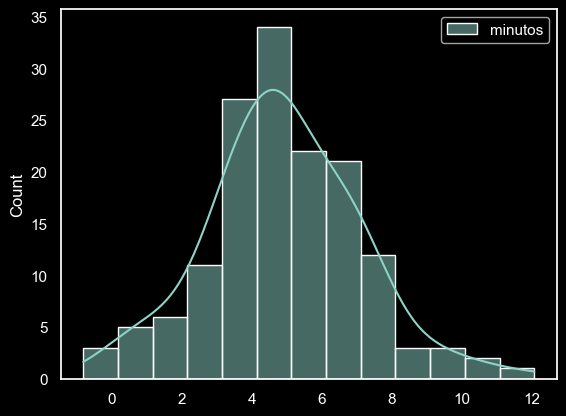

In [14]:
sns.histplot(df1, kde=True)

In [15]:
#No hay diferencia significativa en el tiempo promedio que los usuarios pasan en la página entre los grupos.

Si el valor de F es grande y el valor p es pequeño como en este caso, entonces esto sugiere que al menos uno de los métodos tiene un efecto significativo en los minutos

#### Ejercicio 2: Densidad de Fluidos 


La convección es un mecanismo fundamental de transferencia de calor en fluidos, que ocurre debido a las variaciones en la densidad provocadas por diferencias de temperatura. Este fenómeno se manifiesta cuando las porciones del fluido que se calientan, al volverse menos densas, ascienden hacia regiones de menor temperatura, mientras que las porciones más frías, al ser más densas, descienden hacia las zonas donde la temperatura es más alta. Este movimiento continuo da lugar a las llamadas corrientes de convección, las cuales desempeñan un papel crucial en la distribución homogénea de la temperatura dentro del fluido, promoviendo un equilibrio térmico.

En este contexto, se ha diseñado y ejecutado un experimento con el propósito de investigar cómo se ve afectada la densidad de un fluido cuando se incrementa la temperatura en una región específica del sistema; por tanto se asegura la independencia y aleatoriedad del mismo. El objetivo del experimento es comprender en detalle las modificaciones en la densidad que resultan de este aumento térmico y cómo estas afectan el comportamiento global del fluido.


1. Analiza las suposiciones del modelo: ¿Se cumplen las condiciones de homocedasticidad, independencia y normalidad?
2. ¿Tiene la temperatura un impacto notable en la densidad del fluido?
3. ¿Es posible concluir que las temperaturas de 100 y 125 provocan, en promedio, una menor densidad en el fluido comparadas con las temperaturas de 150 y 175?

In [16]:
df = pd.read_csv('datos/densidad_fluidos.csv')

In [17]:
df.head()

,temperatura,densidad
0,100,21.790655
1,100,21.725900
2,100,21.806052
3,100,21.895319
4,100,21.716121


In [18]:
df.dtypes

temperatura      int64
densidad       float64
dtype: object

In [22]:
df['temperatura'].unique()

array([100, 125, 150, 175])

In [23]:
df['temperatura'].astype(object)                #temperatura es nuestra variable categorica

0      100
1      100
2      100
3      100
4      100
      ... 
395    175
396    175
397    175
398    175
399    175
Name: temperatura, Length: 400, dtype: object

In [24]:
sa.exploracion_dataframe(df1,'metodo')  

El número de datos es 150 y el de columnas es 2

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 0

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos



 ..................... 

Los tipos de las columnas son:


,tipo_dato
minutos,float64
metodo,object



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna METODO tiene las siguientes valore únicos:


,count
metodo,
A,50
B,50
C,50



 ..................... 

Los principales estadísticos de las columnas categóricas para el A son: 


,count,unique,top,freq
metodo,50,1,A,50



 ..................... 

Los principales estadísticos de las columnas numéricas para el A son: 


,count,mean,std,min,25%,50%,75%,max
minutos,50.0,4.720512,2.102454,0.130465,3.312806,4.690071,6.005251,9.584416



 ..................... 

Los principales estadísticos de las columnas categóricas para el B son: 


,count,unique,top,freq
metodo,50,1,B,50



 ..................... 

Los principales estadísticos de las columnas numéricas para el B son: 


,count,mean,std,min,25%,50%,75%,max
minutos,50.0,4.364523,2.085242,-0.818899,3.597334,4.506685,5.825817,7.668974



 ..................... 

Los principales estadísticos de las columnas categóricas para el C son: 


,count,unique,top,freq
metodo,50,1,C,50



 ..................... 

Los principales estadísticos de las columnas numéricas para el C son: 


,count,mean,std,min,25%,50%,75%,max
minutos,50.0,5.600274,2.329937,1.334696,4.071824,5.064969,6.976655,12.059491


In [28]:
df['temperatura'].unique()      #sacamos los unicos para iterar sobre las categorias de temperaturas

array([100, 125, 150, 175])

In [32]:
for i in df['temperatura'].unique():
    normalidad=sa.Asunciones(df[df['temperatura'] == i], "densidad")
    normalidad.identificar_normalidad_analitica(metodo="shapiro",alpha=0.05, verbose=True)

Para la columna densidad, los datos siguen una distribución normal según el test de Shapiro-Wilk.
Para la columna densidad, los datos siguen una distribución normal según el test de Shapiro-Wilk.
Para la columna densidad, los datos siguen una distribución normal según el test de Shapiro-Wilk.
Para la columna densidad, los datos siguen una distribución normal según el test de Shapiro-Wilk.


<Axes: xlabel='densidad', ylabel='Count'>

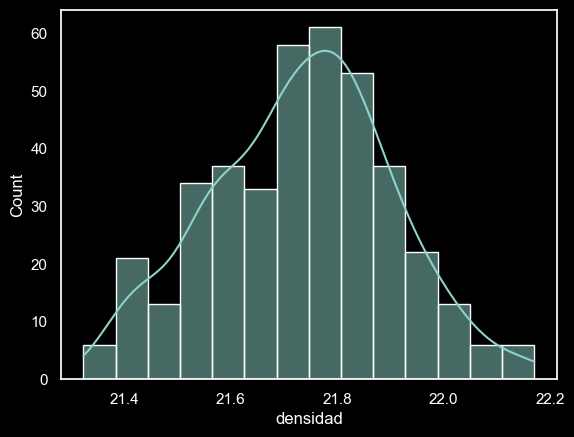

In [35]:
sns.histplot(df['densidad'], kde=True)

In [36]:
homo =sa.Asunciones(df, "densidad")
homo.identificar_homogeneidad("temperatura")

En la variable temperatura las varianzas son homogéneas entre grupos.


2. ¿Tiene la temperatura un impacto notable en la densidad del fluido?

In [37]:
anova_test = sa.Pruebas_parametricas("temperatura",  "densidad", df)
anova_test.test_anova()                                             #usamos anova porque tenemos 3 categorias

Estadístico F: 212.84277610615817
Valor p: 3.327798065119595e-82
El p-valor de la prueba es 0.0, por lo tanto, hay diferencias significativas entre los grupos.


<Axes: xlabel='temperatura', ylabel='densidad'>

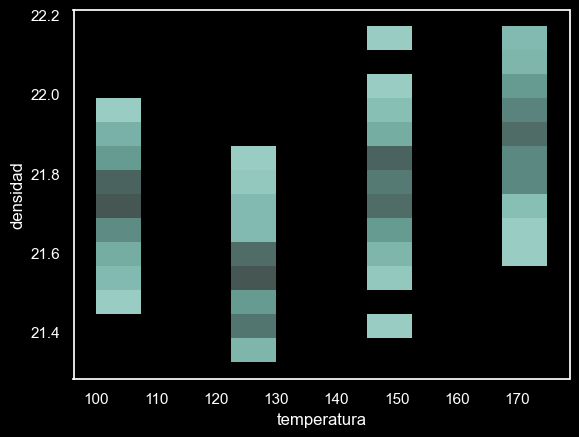

In [40]:
sns.histplot(data=df, x='temperatura', y='densidad')

¿Es posible concluir que las temperaturas de 100 y 125 provocan, en promedio, una menor densidad en el fluido comparadas con las temperaturas de 150 y 175?